# Trabajo práctico integrador de CDD 2023

### Curso: 5K3
### Grupo: 04
### Integrantes:
- 78355	Azulay, David
- 87930	Brocanelli, Valentina
- 65155	Galizio, Matias
- 83723	Perlo, Matias
- 86852	Zuin, Lorenzo


## Objetivo del Notebook

El objetivo del siguiente Notebook es sintetizar el trabajo realizado durante las etapas del proyecto de ciencia de datos llevado a cabo sobre el set de datos recopilados sobre Libros y Reseñas realizadas dentro de la tienda de Amazon, su análisis y preprocesamiento. El mismo contiene el código ejecutado y documentado que nos permita repetir facilmente los resultados.

Para el trabajo, hemos utilizado los datos obtenidos desde el sitio de [Kraggle](https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews?select=books_data.csv), usando los nombres originales de los archivos y almacenados dentro de una subcarpeta `data/`.

## Pregunta del backlog para resolver

- Extender tabla de libros con las columnas ISBN y precio.
- Unificar tablas.
- Obtener la estadísticas de puntajes de reseñas de cada libro.
- Desarrollar un modelo predictivo para predecir el puntaje de una reseña de acuerdo a, inicialmente, su autor, género y precio.
- Desarrollar un modelo predictivo para predecir la utilidad de una reseña de acuerdo a, inicialmente, la longitud de su descripción.
- Realizar conclusiones de los modelos realizados.


# Lectura y exploración de los datos

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzy_match import algorithims

In [208]:
# carga de df_books
columns_books = ['Title', 'authors', 'image', 'previewLink', 'publisher', 'publishedDate', 'infoLink',
               'categories', 'ratingsCount']

columns_reviews = ['Id', 'Title', 'Price', 'review/helpfulness', 'review/score', 'review/text']

df_books = pd.read_csv('data/books_data.csv', usecols=columns_books)
df_books.head(10)

,Title,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN
5,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0
6,The Overbury affair (Avon),['Miriam Allen De Ford'],NaN,http://books.google.nl/books?id=mHLTngEACAAJ&d...,NaN,1960,http://books.google.nl/books?id=mHLTngEACAAJ&d...,NaN,NaN
7,A Walk in the Woods: a Play in Two Acts,['Lee Blessing'],NaN,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,1988,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,3.0
8,Saint Hyacinth of Poland,['Mary Fabyan Windeatt'],http://books.google.com/books/content?id=lmLqA...,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,Tan Books & Pub,2009-01-01,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,['Biography & Autobiography'],NaN
9,Rising Sons and Daughters: Life Among Japan's ...,['Steven Wardell'],NaN,http://books.google.nl/books?id=rbLZugEACAAJ&d...,Plympton PressIntl,1995,http://books.google.nl/books?id=rbLZugEACAAJ&d...,['Social Science'],NaN


In [209]:
# carga de df_reviews
df_reviews = pd.read_csv('data/Books_rating.csv', usecols=columns_reviews)
df_reviews.head(10)

,Id,Title,Price,review/helpfulness,review/score,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,7/7,4.0,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,10/10,5.0,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,10/11,5.0,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,7/7,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,3/3,4.0,Philip Nel - Dr. Seuss: American IconThis is b...
5,0826414346,Dr. Seuss: American Icon,NaN,2/2,4.0,"""Dr. Seuss: American Icon"" by Philip Nel is a ..."
6,0826414346,Dr. Seuss: American Icon,NaN,3/4,5.0,Theodor Seuss Giesel was best known as 'Dr. Se...
7,0826414346,Dr. Seuss: American Icon,NaN,0/0,5.0,When I recieved this book as a gift for Christ...
8,0826414346,Dr. Seuss: American Icon,NaN,0/0,5.0,Trams (or any public transport) are not usuall...
9,0826414346,Dr. Seuss: American Icon,NaN,3/5,4.0,"As far as I am aware, this is the first book-l..."


In [210]:
# datos de df_book
print("Datos de books_data.csv")
print("Datos por columna:\n", df_books.count(), sep="", end="\n\n")
print("Datos faltantes por columna:\n", df_books.isna().sum(), sep="", end="\n\n")
print("% datos faltantes por columna:\n", df_books.isna().sum() * 100 / len(df_books), sep="", end="\n\n")

Datos de books_data.csv
Datos por columna:
Title            212403
authors          180991
image            160329
previewLink      188568
publisher        136518
publishedDate    187099
infoLink         188568
categories       171205
ratingsCount      49752
dtype: int64

Datos faltantes por columna:
Title                 1
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

% datos faltantes por columna:
Title             0.000471
authors          14.789270
image            24.516958
previewLink      11.222011
publisher        35.727199
publishedDate    11.913617
infoLink         11.222011
categories       19.396527
ratingsCount     76.576712
dtype: float64



In [211]:
# datos de df_reviews
print("Datos de Books_rating.csv")
print("Datos por columna:\n", df_reviews.count(), sep="", end="\n\n")
print("Datos faltantes por columna:\n", df_reviews.isna().sum(), sep="", end="\n\n")
print("% datos faltantes por columna:\n", df_reviews.isna().sum() * 100 / len(df_reviews), sep="", end="\n\n")

Datos de Books_rating.csv
Datos por columna:
Id                    3000000
Title                 2999792
Price                  481171
review/helpfulness    3000000
review/score          3000000
review/text           2999992
dtype: int64

Datos faltantes por columna:
Id                          0
Title                     208
Price                 2518829
review/helpfulness          0
review/score                0
review/text                 8
dtype: int64

% datos faltantes por columna:
Id                     0.000000
Title                  0.006933
Price                 83.960967
review/helpfulness     0.000000
review/score           0.000000
review/text            0.000267
dtype: float64



# Preprocesamiento de los datos

El preprocesamiento de los datos ha sido dividido en sub-etapas. En la finalización de cada sub-etapa obtenemos modificaciones en el datasets que son almacenados en archivos nuevos, lo que nos permitió evitar la repetición de ejecuciones de gran cantidad de datos ya trabajados.

### Primera etapa de preprocesado

Salidas de la primera etapa:
- registros de las reviews sin las columnas innecesarias y solo con libros con ISBN
- registros de los libros con ISBN

#### Completar dato faltante en df de libros

In [212]:
# completar el registro del libro sin titulo
titulo_faltante = df_books[df_books["Title"].isna()]
print(titulo_faltante)
# Indice en df_books: 1066

del titulo_faltante

# Buscando en los links encontramos su nombre: "Nan Yar - Who Am I?"
df_books.loc[1066, "Title"] = "Nan Yar - Who Am I?"
print(df_books.isna().sum())

     Title              authors  \
1066   NaN  ['Maharshi Ramana']   

                                                  image  \
1066  http://books.google.com/books/content?id=uq0uj...   

                                            previewLink publisher  \
1066  http://books.google.nl/books?id=uq0ujwEACAAJ&d...       NaN   

     publishedDate                                           infoLink  \
1066    2015-12-15  http://books.google.nl/books?id=uq0ujwEACAAJ&d...   

     categories  ratingsCount  
1066        NaN           1.0  
Title                 0
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64


#### Visualizar cantidad de libros no duplicados

In [213]:
# filtrar la cantidad de libros unicos registrados en df_books y df_reviews
# Series del datasets de libros sin titulos duplicados
df_books_unique = df_books["Title"].drop_duplicates(ignore_index=True)

# Series del datasets de reviews que recolecta los titulos sin duplicar provenientes del df de reviews
df_reviews_books_id_titulo = df_reviews[["Id","Title"]].drop_duplicates(ignore_index=True) #Acá podríamos aprovechar y agregar el precio también. Así ya lo podemos unificar con la otra tabla

# Series del datasets de reviews para saber cuantos ids diferentes hay registrados
# df_reviews_books_id = df_reviews["Id"].drop_duplicates(ignore_index=True)

print("\nCantidad de titulos sin duplicar en el df de libros: {}".format(df_books_unique.count()), end="\n")
# Cantidad de titulos sin duplicar en el df de libros: 212403

print("\nCantidad de IDs y Titulos de libros sin duplicar encontrados en el df de reviews:", df_reviews_books_id_titulo.count(), sep="\n", end="\n")
# Cantidad de titulos sin duplicar en el df de reviews: 221989

print("\nCantidad de IDs y Titulos faltantes en la lista sin duplicar del df de reviews:", df_reviews_books_id_titulo.isna().sum(), sep="\n", end="\n")
# Cantidad de titulos sin duplicar en el df de reviews: 221989


Cantidad de titulos sin duplicar en el df de libros: 212404

Cantidad de IDs y Titulos de libros sin duplicar encontrados en el df de reviews:
Id       221998
Title    221989
dtype: int64

Cantidad de IDs y Titulos faltantes en la lista sin duplicar del df de reviews:
Id       0
Title    9
dtype: int64


In [214]:
# vistazo a la lista libros sin duplicar del df de libros
print("\n\nHead books\n")
print(df_books_unique.head(10))



Head books

0                       Its Only Art If Its Well Hung!
1                             Dr. Seuss: American Icon
2                Wonderful Worship in Smaller Churches
3                        Whispers of the Wicked Saints
4    Nation Dance: Religion, Identity and Cultural ...
5    The Church of Christ: A Biblical Ecclesiology ...
6                           The Overbury affair (Avon)
7              A Walk in the Woods: a Play in Two Acts
8                             Saint Hyacinth of Poland
9    Rising Sons and Daughters: Life Among Japan's ...
Name: Title, dtype: object


In [215]:
# vistazo a la lista de ids y titulos sin duplicar del df de reviews
print("\n\nHead reviews\n")
print(df_reviews_books_id_titulo.head(10))



Head reviews

           Id                                              Title
0  1882931173                     Its Only Art If Its Well Hung!
1  0826414346                           Dr. Seuss: American Icon
2  0829814000              Wonderful Worship in Smaller Churches
3  0595344550                      Whispers of the Wicked Saints
4  0253338352  Nation Dance: Religion, Identity and Cultural ...
5  0802841899  The Church of Christ: A Biblical Ecclesiology ...
6  B0007FIF28                         The Overbury affair (Avon)
7  B000JINSBG            A Walk in the Woods: a Play in Two Acts
8  0895554224                           Saint Hyacinth of Poland
9  0963923080  Rising Sons and Daughters: Life Among Japan's ...


#### Filtrado de libros con ISBNs

Para este trabajo, dejaremos de lado los libros identificados con ASIN y nos enfocaremos unicamente en aquellos con ISBN

In [216]:
# filtramos los registros obtenidos en el df de reviews por ISBN (ids numéricos)
df_reviews_titulos_con_isbn = df_reviews_books_id_titulo[pd.to_numeric(df_reviews_books_id_titulo['Id'], errors='coerce').notnull()]

In [217]:
# revisamos el resultado
print("\nCantidad de titulos con ISBN asociado:\n", df_reviews_titulos_con_isbn[["Id", "Title"]].count(), sep="\n", end="\n\n") #130.009 libros
print(df_reviews_titulos_con_isbn.head(20))


Cantidad de titulos con ISBN asociado:

Id       130009
Title    130004
dtype: int64

            Id                                              Title
0   1882931173                     Its Only Art If Its Well Hung!
1   0826414346                           Dr. Seuss: American Icon
2   0829814000              Wonderful Worship in Smaller Churches
3   0595344550                      Whispers of the Wicked Saints
4   0253338352  Nation Dance: Religion, Identity and Cultural ...
5   0802841899  The Church of Christ: A Biblical Ecclesiology ...
8   0895554224                           Saint Hyacinth of Poland
9   0963923080  Rising Sons and Daughters: Life Among Japan's ...
10  0854968350  Muslim Women's Choices: Religious Belief and S...
11  0918973031                        Dramatica for Screenwriters
12  1858683092   Mensa Number Puzzles (Mensa Word Games for Kids)
13  0792391810  Vector Quantization and Signal Compression (Th...
15  0908968000                                Gold and 

In [218]:
# nos quedamos solo con las reviews que tengan asociados libros con ISBN
df_reviews = df_reviews[pd.to_numeric(df_reviews['Id'], errors='coerce').notnull()]

print("Cantidad de reviews de libros con ISBN:")
print(df_reviews.count(), end="\n\n") 
# Cantidad de reviews de libros con ISBN:
# Id         1314561
# Title      1314368

# vemos los datos faltantes de cada fila
print("Cantidad de datos faltantes en estas reviews:")
print(df_reviews.isna().sum()) 
# Cantidad de datos faltantes en estas reviews:
# Id                         0
# Title                    193

Cantidad de reviews de libros con ISBN:
Id                    1314561
Title                 1314368
Price                  410313
review/helpfulness    1314561
review/score          1314561
review/text           1314560
dtype: int64

Cantidad de datos faltantes en estas reviews:
Id                         0
Title                    193
Price                 904248
review/helpfulness         0
review/score               0
review/text                1
dtype: int64


In [219]:
# ISBNs y cantidad de reviews por titulo faltantes
print(df_reviews[df_reviews['Title'].isna()]['Id'].value_counts())

Id
0912411201    185
0801841119      3
0595241034      3
0313329486      1
0595292763      1
Name: count, dtype: int64


In [220]:
# completamos las reviews y el listado de titulos con los titulos faltantes
# los datos fueron obtenidos mediante la investigación de los ISBNs

titulos = {
    '0801841119': "Eclogues and Georgics of Virgil",
    '0595241034': "Delicate Relations",
    '0912411201': "Tinseltowns U.S.A",
    '0313329486': "Federalism in America: An Encyclopedia, Volume I, A-J",
    '0595292763': "Stars of the Southern Cross"
}

df_reviews['Title'] = df_reviews['Id'].map(titulos).fillna(df_reviews['Title'])
df_reviews_titulos_con_isbn['Title'] = df_reviews_titulos_con_isbn['Id'].map(titulos).fillna(df_reviews_titulos_con_isbn['Title'])

C:\Users\emmag\AppData\Local\Temp\ipykernel_6340\1913201905.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_titulos_con_isbn['Title'] = df_reviews_titulos_con_isbn['Id'].map(titulos).fillna(df_reviews_titulos_con_isbn['Title'])


In [221]:
# revisamos
print("Cantidad de reviews por ISBN con titulo faltantes:")
print(df_reviews[df_reviews['Title'].isna()]['Id'].value_counts())
print()
print("Cantidad de titulos faltantes en el df de titulos en reviews:")
print(df_reviews_titulos_con_isbn.isna().sum())

Cantidad de reviews por ISBN con titulo faltantes:
Series([], Name: count, dtype: int64)

Cantidad de titulos faltantes en el df de titulos en reviews:
Id       0
Title    0
dtype: int64


In [222]:
# vemos algunos registros de los resultados
df_reviews[df_reviews['Id'] == '0801841119']

,Id,Title,Price,review/helpfulness,review/score,review/text
358889,0801841119,Eclogues and Georgics of Virgil,17.95,25/25,2.0,"I only read Georgics in this book, but I'm not..."
358890,0801841119,Eclogues and Georgics of Virgil,17.95,12/12,1.0,You can't even really call this a translation;...
358891,0801841119,Eclogues and Georgics of Virgil,17.95,5/12,5.0,Slavitt's translation of Virgil's Eclogues and...


In [223]:
# vemos si los libros agregados se encuentran en el df de libros
df_books[df_books['Title'].isin(list(titulos.values()))]

,Title,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount


In [224]:
# revisamos los tipos de las celdas para empezar el registro al df books
print(df_books.dtypes)

# ejemplo de un registro completo
df_books.loc[212402]

Title             object
authors           object
image             object
previewLink       object
publisher         object
publishedDate     object
infoLink          object
categories        object
ratingsCount     float64
dtype: object


Title                                            The Autograph Man
authors                                            ['Zadie Smith']
image            http://books.google.com/books/content?id=JM6YV...
previewLink      http://books.google.com/books?id=JM6YVPx_clMC&...
publisher                                                  Vintage
publishedDate                                           2003-08-12
infoLink         https://play.google.com/store/books/details?id...
categories                                             ['Fiction']
ratingsCount                                                  19.0
Name: 212402, dtype: object

In [225]:
# creamos los registros a insertar
# fuente: https://isbnsearch.org/
libros = [
    { 
        'Title': "Eclogues and Georgics of Virgil",
        'authors': str(['Virgil, David']),
        'image': np.nan,
        'previewLink': np.nan,
        'publisher': 'Johns Hopkins University Press',
        'publishedDate': '1990-10-01',
        'infoLink': np.nan,
        'categories': np.nan,
        'ratingsCount': np.nan
    },
    { 
        'Title': "Delicate Relations",
        'authors': str(['Xichel']),
        'image': np.nan,
        'previewLink': np.nan,
        'publisher': 'iUniverse',
        'publishedDate': '2002-10-24',
        'infoLink': np.nan,
        'categories': np.nan,
        'ratingsCount': np.nan
    },
    { 
        'Title': "Tinseltowns U.S.A",
        'authors': str(['Kremer, John']),
        'image': np.nan,
        'previewLink': np.nan,
        'publisher': 'Players Press',
        'publishedDate': '1998',
        'infoLink': np.nan,
        'categories': np.nan,
        'ratingsCount': np.nan
    },
    { 
        'Title': "Federalism in America: An Encyclopedia, Volume I, A-J",
        'authors': str([]),
        'image': np.nan,
        'previewLink': np.nan,
        'publisher': 'Greenwood',
        'publishedDate': '2005',
        'infoLink': np.nan,
        'categories': np.nan,
        'ratingsCount': np.nan
    },
    { 
        'Title': "Stars of the Southern Cross",
        'authors': str(['Hill, A. Robert']),
        'image': np.nan,
        'previewLink': np.nan,
        'publisher': 'iUniverse',
        'publishedDate': '2003-12-07',
        'infoLink': np.nan,
        'categories': np.nan,
        'ratingsCount': np.nan
    }
]




In [226]:
# revisamos
df_books.tail(5)

,Title,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
212399,The Orphan Of Ellis Island (Time Travel Advent...,['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0
212400,Red Boots for Christmas,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995,http://books.google.com/books?id=3n8k6wl4BbYC&...,['Juvenile Fiction'],NaN
212401,Mamaw,['Wild Wild Cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,2018-01-17,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN
212402,The Autograph Man,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0
212403,Student's Solutions Manual for Johnson/Mowry's...,"['David B. Johnson', 'Thomas A. Mowry']",http://books.google.com/books/content?id=dehfP...,http://books.google.com/books?id=dehfPgAACAAJ&...,Brooks/Cole Publishing Company,1998-01-01,http://books.google.com/books?id=dehfPgAACAAJ&...,NaN,NaN


In [227]:
# insertamos los registros
for libro in libros:
    df_books.loc[len(df_books)] = libro

In [228]:
#Eliminación de libros de la tabla de libros que no están en la tabla de reviews de libros registrados solo con ISBN
titulos = df_reviews_titulos_con_isbn['Title'].to_numpy()
print("Cantidad de titulos: {}".format(len(titulos)))

df_books = df_books[df_books['Title'].isin(titulos)]
print("Cantidad de libros en tabla de libros:")
print(df_books.count())

df_books.head(10)

Cantidad de titulos: 130009
Cantidad de libros en tabla de libros:
Title            127339
authors          108529
image             99640
previewLink      112955
publisher         87988
publishedDate    112114
infoLink         112955
categories       104906
ratingsCount      27528
dtype: int64


,Title,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN
5,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0
8,Saint Hyacinth of Poland,['Mary Fabyan Windeatt'],http://books.google.com/books/content?id=lmLqA...,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,Tan Books & Pub,2009-01-01,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,['Biography & Autobiography'],NaN
9,Rising Sons and Daughters: Life Among Japan's ...,['Steven Wardell'],NaN,http://books.google.nl/books?id=rbLZugEACAAJ&d...,Plympton PressIntl,1995,http://books.google.nl/books?id=rbLZugEACAAJ&d...,['Social Science'],NaN
10,Muslim Women's Choices: Religious Belief and S...,"['Camillia Fawzi El-Solh', 'Judy Mabro']",http://books.google.com/books/content?id=o7izA...,http://books.google.nl/books?id=o7izAAAAIAAJ&q...,Berg Pub Limited,1994-02-17,http://books.google.nl/books?id=o7izAAAAIAAJ&d...,['Religion'],NaN
11,Dramatica for Screenwriters,['Armando Salda A-Mora'],http://books.google.com/books/content?id=iTueu...,http://books.google.nl/books?id=iTueuAAACAAJ&d...,NaN,2005-07,http://books.google.nl/books?id=iTueuAAACAAJ&d...,['Reference'],NaN


In [229]:
#Titulos de libros que están en el archivo de reviews pero no en el de libros

array_titulos = df_books['Title'].to_numpy()
print(f"Cantidad de libros en tabla de libros solo con ISBN en tabla de reviews: {len(array_titulos)}")
print(f"Cantidad de libros con ISBN que tienen una review : {df_reviews['Title'].count()}")

df_reviews_not_in_books = df_reviews[~df_reviews['Title'].isin(array_titulos)]
print("Cantidad de libros que tienen una review registrados con ISBN pero que no están en la tabla de libros")
print(df_reviews_not_in_books.count())

print("Libros que tienen una review pero que no están registrados en la tabla de libros") #Capaz que se pueden eliminar tambien
df_reviews_not_in_books.head(10)

Cantidad de libros en tabla de libros solo con ISBN en tabla de reviews: 127339
Cantidad de libros con ISBN que tienen una review : 1314561
Cantidad de libros que tienen una review registrados con ISBN pero que no están en la tabla de libros
Id                    0
Title                 0
Price                 0
review/helpfulness    0
review/score          0
review/text           0
dtype: int64
Libros que tienen una review pero que no están registrados en la tabla de libros


,Id,Title,Price,review/helpfulness,review/score,review/text


Esta diferencia de aproximadamente 3000 libros indica que los dos dataframes divergen en cuanto a los libros sobre los que tratan, es decir, en el dataframe de reseñas hay reseñas para libros que no están registrados en el dataframe de libros, y libros en el dataframe de libros que no tienen ninguna reseña.

In [230]:
df_reviews_titulos_con_isbn.head(10)

,Id,Title
0,1882931173,Its Only Art If Its Well Hung!
1,0826414346,Dr. Seuss: American Icon
2,0829814000,Wonderful Worship in Smaller Churches
3,0595344550,Whispers of the Wicked Saints
4,0253338352,"Nation Dance: Religion, Identity and Cultural ..."
5,0802841899,The Church of Christ: A Biblical Ecclesiology ...
8,0895554224,Saint Hyacinth of Poland
9,0963923080,Rising Sons and Daughters: Life Among Japan's ...
10,0854968350,Muslim Women's Choices: Religious Belief and S...
11,0918973031,Dramatica for Screenwriters


In [231]:
df_books = df_books.drop(['image', 'previewLink','infoLink', 'publishedDate'], axis=1)

Agregar el ISBN al df de libros

In [232]:
df_books = df_books.merge(df_reviews_titulos_con_isbn[['Title', 'Id']], on='Title', how='left')
df_books.head(10)

,Title,authors,publisher,categories,ratingsCount,Id
0,Its Only Art If Its Well Hung!,['Julie Strain'],NaN,['Comics & Graphic Novels'],NaN,1882931173
1,Dr. Seuss: American Icon,['Philip Nel'],A&C Black,['Biography & Autobiography'],NaN,0826414346
2,Wonderful Worship in Smaller Churches,['David R. Ray'],NaN,['Religion'],NaN,0829814000
3,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],NaN,0595344550
4,"Nation Dance: Religion, Identity and Cultural ...",['Edward Long'],NaN,NaN,NaN,0253338352
5,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,['Religion'],5.0,0802841899
6,Saint Hyacinth of Poland,['Mary Fabyan Windeatt'],Tan Books & Pub,['Biography & Autobiography'],NaN,0895554224
7,Rising Sons and Daughters: Life Among Japan's ...,['Steven Wardell'],Plympton PressIntl,['Social Science'],NaN,0963923080
8,Muslim Women's Choices: Religious Belief and S...,"['Camillia Fawzi El-Solh', 'Judy Mabro']",Berg Pub Limited,['Religion'],NaN,0854968350
9,Dramatica for Screenwriters,['Armando Salda A-Mora'],NaN,['Reference'],NaN,0918973031


In [233]:
df_books.count()

Title           130009
authors         110917
publisher        90069
categories      107180
ratingsCount     28449
Id              130009
dtype: int64

Migrar columna Id al principio del dataframe

In [234]:
isbn_column = df_books['Id']
df_books = df_books.drop(columns=['Id'])
df_books.insert(0, 'Id', isbn_column)
df_books

,Id,Title,authors,publisher,categories,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,['Julie Strain'],NaN,['Comics & Graphic Novels'],NaN
1,0826414346,Dr. Seuss: American Icon,['Philip Nel'],A&C Black,['Biography & Autobiography'],NaN
2,0829814000,Wonderful Worship in Smaller Churches,['David R. Ray'],NaN,['Religion'],NaN
3,0595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],NaN
4,0253338352,"Nation Dance: Religion, Identity and Cultural ...",['Edward Long'],NaN,NaN,NaN
...,...,...,...,...,...,...
130004,0801841119,Eclogues and Georgics of Virgil,"['Virgil, David']",Johns Hopkins University Press,NaN,NaN
130005,0595241034,Delicate Relations,['Xichel'],iUniverse,NaN,NaN
130006,0912411201,Tinseltowns U.S.A,"['Kremer, John']",Players Press,NaN,NaN
130007,0313329486,"Federalism in America: An Encyclopedia, Volume...",[],Greenwood,NaN,NaN


In [235]:
# guardar los resultados df_books

df_books.to_csv('data/1_books.csv', index=False)

In [236]:
# guardar los resultados df_reviews
df_reviews.to_csv('data/1_reviews.csv', index=False)

## Segunda etapa de preprocesado

Se pueden cargar opcionalmente los datos almacenados en la finalización de la primera etapa de preprocesado, sin tener que repetirla.

In [237]:
import pandas as pd
import numpy as np
from fuzzy_match import algorithims

In [238]:
# cargar libros
df_books = pd.read_csv('data/1_books.csv')

In [239]:
# cargar reviews
df_reviews = pd.read_csv('data/1_reviews.csv')

In [240]:
# ver libros de ejemplo
df_books.head(10)

,Id,Title,authors,publisher,categories,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,['Julie Strain'],NaN,['Comics & Graphic Novels'],NaN
1,826414346,Dr. Seuss: American Icon,['Philip Nel'],A&C Black,['Biography & Autobiography'],NaN
2,829814000,Wonderful Worship in Smaller Churches,['David R. Ray'],NaN,['Religion'],NaN
3,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],NaN
4,253338352,"Nation Dance: Religion, Identity and Cultural ...",['Edward Long'],NaN,NaN,NaN
5,802841899,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,['Religion'],5.0
6,895554224,Saint Hyacinth of Poland,['Mary Fabyan Windeatt'],Tan Books & Pub,['Biography & Autobiography'],NaN
7,963923080,Rising Sons and Daughters: Life Among Japan's ...,['Steven Wardell'],Plympton PressIntl,['Social Science'],NaN
8,854968350,Muslim Women's Choices: Religious Belief and S...,"['Camillia Fawzi El-Solh', 'Judy Mabro']",Berg Pub Limited,['Religion'],NaN
9,918973031,Dramatica for Screenwriters,['Armando Salda A-Mora'],NaN,['Reference'],NaN


In [241]:
# ver info libros
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130009 entries, 0 to 130008
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            130009 non-null  int64  
 1   Title         130009 non-null  object 
 2   authors       110917 non-null  object 
 3   publisher     90069 non-null   object 
 4   categories    107180 non-null  object 
 5   ratingsCount  28449 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [242]:
# ver reviews de ejemplo
df_reviews.head(10)

,Id,Title,Price,review/helpfulness,review/score,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,7/7,4.0,This is only for Julie Strain fans. It's a col...
1,826414346,Dr. Seuss: American Icon,NaN,10/10,5.0,I don't care much for Dr. Seuss but after read...
2,826414346,Dr. Seuss: American Icon,NaN,10/11,5.0,"If people become the books they read and if ""t..."
3,826414346,Dr. Seuss: American Icon,NaN,7/7,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,826414346,Dr. Seuss: American Icon,NaN,3/3,4.0,Philip Nel - Dr. Seuss: American IconThis is b...
5,826414346,Dr. Seuss: American Icon,NaN,2/2,4.0,"""Dr. Seuss: American Icon"" by Philip Nel is a ..."
6,826414346,Dr. Seuss: American Icon,NaN,3/4,5.0,Theodor Seuss Giesel was best known as 'Dr. Se...
7,826414346,Dr. Seuss: American Icon,NaN,0/0,5.0,When I recieved this book as a gift for Christ...
8,826414346,Dr. Seuss: American Icon,NaN,0/0,5.0,Trams (or any public transport) are not usuall...
9,826414346,Dr. Seuss: American Icon,NaN,3/5,4.0,"As far as I am aware, this is the first book-l..."


In [243]:
# contar info reviews
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314561 entries, 0 to 1314560
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Id                  1314561 non-null  int64  
 1   Title               1314561 non-null  object 
 2   Price               410313 non-null   float64
 3   review/helpfulness  1314561 non-null  object 
 4   review/score        1314561 non-null  float64
 5   review/text         1314560 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 60.2+ MB


In [244]:
# esto es solamente para corroborar que todos los numericos son ISBN. Aparentemente no, pero no es relevante de todas formas
df_books.sort_values(by=['Id']).tail(5)

# 9999988318 es ASIN
# Podriamos pensar en usar ambos tipos de IDs juntos y al terminar de filtrar terminan siendo muy pocos

,Id,Title,authors,publisher,categories,ratingsCount
79047,9999883605,An Elegant Art: Fashion and Fantasy in the Eig...,"['Los Angeles County Museum of Art', 'Edward M...",Los Angeles : Los Angeles County Museum of Art...,['Social Science'],NaN
54850,9999931200,Chaco Journey: Remembrance and Awakening,NaN,NaN,NaN,NaN
63583,9999967280,The Scottish Soldier,NaN,NaN,NaN,NaN
47631,9999972403,The Hunting of the Snark,['Lewis Carroll'],NaN,['Adventure stories'],3.0
122902,9999988318,Cream of Wheat Advertising Art,NaN,NaN,NaN,NaN


Unificar precios y agregarlos al df de libros

In [245]:
# promediar el precio de los libros y agregarlos al df_books
precio_promedio = df_reviews.groupby('Id')['Price'].agg(lambda x: np.nanmean(x[x.notna()])).reset_index()
df_books = df_books.merge(precio_promedio, on='Id', how='left')

df_books.head(20)

C:\Users\emmag\AppData\Local\Temp\ipykernel_6340\432057365.py:2: RuntimeWarning: Mean of empty slice
  precio_promedio = df_reviews.groupby('Id')['Price'].agg(lambda x: np.nanmean(x[x.notna()])).reset_index()


,Id,Title,authors,publisher,categories,ratingsCount,Price
0,1882931173,Its Only Art If Its Well Hung!,['Julie Strain'],NaN,['Comics & Graphic Novels'],NaN,NaN
1,826414346,Dr. Seuss: American Icon,['Philip Nel'],A&C Black,['Biography & Autobiography'],NaN,NaN
2,829814000,Wonderful Worship in Smaller Churches,['David R. Ray'],NaN,['Religion'],NaN,19.40
3,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],NaN,10.95
4,253338352,"Nation Dance: Religion, Identity and Cultural ...",['Edward Long'],NaN,NaN,NaN,39.95
5,802841899,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,['Religion'],5.0,25.97
6,895554224,Saint Hyacinth of Poland,['Mary Fabyan Windeatt'],Tan Books & Pub,['Biography & Autobiography'],NaN,13.95
7,963923080,Rising Sons and Daughters: Life Among Japan's ...,['Steven Wardell'],Plympton PressIntl,['Social Science'],NaN,NaN
8,854968350,Muslim Women's Choices: Religious Belief and S...,"['Camillia Fawzi El-Solh', 'Judy Mabro']",Berg Pub Limited,['Religion'],NaN,NaN
9,918973031,Dramatica for Screenwriters,['Armando Salda A-Mora'],NaN,['Reference'],NaN,17.95


In [246]:
# revisar el conteo de resultados
df_books.count()

Id              130009
Title           130009
authors         110917
publisher        90069
categories      107180
ratingsCount     28449
Price            41345
dtype: int64

In [247]:
# quedarnos solo con los registros completos de libros
df_books_drop_nan = df_books.copy()
df_books_drop_nan = df_books_drop_nan.drop(columns='ratingsCount')
df_books_drop_nan = df_books_drop_nan.dropna()
df_books_drop_nan.count()

Id            29562
Title         29562
authors       29562
publisher     29562
categories    29562
Price         29562
dtype: int64

In [248]:
# nos quedamos solo con las reviews de los libros completos
array_isbns = df_books_drop_nan['Id'].to_numpy()
df_reviews_libros_completos = df_reviews[df_reviews['Id'].isin(array_isbns)]

df_reviews_libros_completos.count()
# todos los campos tambien están completos

Id                    301789
Title                 301789
Price                 301789
review/helpfulness    301789
review/score          301789
review/text           301789
dtype: int64

### Almacenado de nuevos dataframes:

In [249]:
df_books_drop_nan.to_csv('data/2_books.csv', index=False)

In [250]:
df_reviews_libros_completos.to_csv('data/2_reviews.csv', index=False)

## Tercera etapa de preprocesado

In [251]:
import pandas as pd
import numpy as np
from fuzzy_match import algorithims

In [252]:
df_books = pd.read_csv('data/2_books.csv')
df_reviews = pd.read_csv('data/2_reviews.csv')

In [253]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29562 entries, 0 to 29561
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          29562 non-null  int64  
 1   Title       29562 non-null  object 
 2   authors     29562 non-null  object 
 3   publisher   29562 non-null  object 
 4   categories  29562 non-null  object 
 5   Price       29562 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


In [254]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301789 entries, 0 to 301788
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  301789 non-null  int64  
 1   Title               301789 non-null  object 
 2   Price               301789 non-null  float64
 3   review/helpfulness  301789 non-null  object 
 4   review/score        301789 non-null  float64
 5   review/text         301789 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 13.8+ MB


### Unificación de los datasets

In [255]:
# se hace un merge de los datos
df = df_books.merge(df_reviews, how='inner', on='Id', suffixes=('_Book', '_Review'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301789 entries, 0 to 301788
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  301789 non-null  int64  
 1   Title_Book          301789 non-null  object 
 2   authors             301789 non-null  object 
 3   publisher           301789 non-null  object 
 4   categories          301789 non-null  object 
 5   Price_Book          301789 non-null  float64
 6   Title_Review        301789 non-null  object 
 7   Price_Review        301789 non-null  float64
 8   review/helpfulness  301789 non-null  object 
 9   review/score        301789 non-null  float64
 10  review/text         301789 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 25.3+ MB


### Diferencias entre títulos de df libros y df de reviews

In [256]:
#verificamos las diferencias entre títulos
df[df['Title_Book']!= df['Title_Review']]
#Se pueden unificar
#El precio se debe dejar el de los libros (Price_x)

,Id,Title_Book,authors,publisher,categories,Price_Book,Title_Review,Price_Review,review/helpfulness,review/score,review/text


In [257]:
# eliminamos las columnas repetidas
df = df.drop(columns=['Title_Review', 'Price_Review'])
df.head(10)

,Id,Title_Book,authors,publisher,categories,Price_Book,review/helpfulness,review/score,review/text
0,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,7/11,1.0,I bought this book because I read some glowing...
1,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1/2,4.0,"I have to admit, I am not one to write reviews..."
2,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1/2,1.0,"This is a self-published book, and if you want..."
3,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,2/4,5.0,When I first read this the I was mezmerized at...
4,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,5/9,5.0,I read the review directly under mine and I ha...
5,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1/3,5.0,I really enjoyed the book. I believe the autho...
6,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,0/2,5.0,This was not a typical romance read. It is dee...
7,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1/4,5.0,I loved Whisper of the wicked saints. The stor...
8,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1/4,5.0,I loved this book for a few reasons. The first...
9,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,0/3,5.0,I thought this book was brilliant. The plot wa...


#### Cambiar review/text por enteros

In [258]:
# reemplazar el texto de reviews por la cantidad de caracteres que posee sin contar espacios.

def filtro_fila_review(row):
    return len(str(row['review/text']).replace(' ', ''))

df['review/text'] = df.apply(filtro_fila_review, axis=1)

In [259]:
df.head(10)

,Id,Title_Book,authors,publisher,categories,Price_Book,review/helpfulness,review/score,review/text
0,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,7/11,1.0,850
1,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1/2,4.0,963
2,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1/2,1.0,588
3,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,2/4,5.0,260
4,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,5/9,5.0,542
5,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1/3,5.0,936
6,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,0/2,5.0,242
7,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1/4,5.0,404
8,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1/4,5.0,439
9,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,0/3,5.0,275


In [260]:
#separar el campo review/helpfulness
review_helpfulness = df['review/helpfulness'].apply(lambda x: x.split("/"))
review_helpfulness_up = review_helpfulness.apply(lambda x: x[0])
review_helpfulness_total = review_helpfulness.apply(lambda x: x[1])

In [261]:
#agregar a la tabla
df.insert(7, 'review_helpfulness_up', review_helpfulness_up)
df.insert(8, 'review_helpfulness_total', review_helpfulness_total)

In [262]:
# revisamos
df.head(10)

,Id,Title_Book,authors,publisher,categories,Price_Book,review/helpfulness,review_helpfulness_up,review_helpfulness_total,review/score,review/text
0,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,7/11,7,11,1.0,850
1,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1/2,1,2,4.0,963
2,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1/2,1,2,1.0,588
3,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,2/4,2,4,5.0,260
4,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,5/9,5,9,5.0,542
5,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1/3,1,3,5.0,936
6,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,0/2,0,2,5.0,242
7,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1/4,1,4,5.0,404
8,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1/4,1,4,5.0,439
9,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,0/3,0,3,5.0,275


In [263]:
# eliminar review/helpfulness
df.drop('review/helpfulness', axis=1)

,Id,Title_Book,authors,publisher,categories,Price_Book,review_helpfulness_up,review_helpfulness_total,review/score,review/text
0,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,7,11,1.0,850
1,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1,2,4.0,963
2,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1,2,1.0,588
3,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,2,4,5.0,260
4,595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,['Fiction'],10.95,5,9,5.0,542
...,...,...,...,...,...,...,...,...,...,...
301784,590482467,The Orphan Of Ellis Island (Time Travel Advent...,['Elvira Woodruff'],Scholastic Paperbacks,['Juvenile Fiction'],3.32,3,4,5.0,518
301785,1402508735,The Autograph Man,['Zadie Smith'],Vintage,['Fiction'],34.99,0,0,1.0,217
301786,1402508735,The Autograph Man,['Zadie Smith'],Vintage,['Fiction'],34.99,0,0,4.0,1173
301787,1402508735,The Autograph Man,['Zadie Smith'],Vintage,['Fiction'],34.99,0,1,3.0,502


In [264]:
# contar la cantidad de autores
authors_count = df['authors'].apply(lambda x: len(eval(x)))
authors_count.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: authors, dtype: int64

In [265]:
df.insert(2, 'authors_count', authors_count)

In [266]:
df.head(10)

,Id,Title_Book,authors_count,authors,publisher,categories,Price_Book,review/helpfulness,review_helpfulness_up,review_helpfulness_total,review/score,review/text
0,595344550,Whispers of the Wicked Saints,1,['Veronica Haddon'],iUniverse,['Fiction'],10.95,7/11,7,11,1.0,850
1,595344550,Whispers of the Wicked Saints,1,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1/2,1,2,4.0,963
2,595344550,Whispers of the Wicked Saints,1,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1/2,1,2,1.0,588
3,595344550,Whispers of the Wicked Saints,1,['Veronica Haddon'],iUniverse,['Fiction'],10.95,2/4,2,4,5.0,260
4,595344550,Whispers of the Wicked Saints,1,['Veronica Haddon'],iUniverse,['Fiction'],10.95,5/9,5,9,5.0,542
5,595344550,Whispers of the Wicked Saints,1,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1/3,1,3,5.0,936
6,595344550,Whispers of the Wicked Saints,1,['Veronica Haddon'],iUniverse,['Fiction'],10.95,0/2,0,2,5.0,242
7,595344550,Whispers of the Wicked Saints,1,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1/4,1,4,5.0,404
8,595344550,Whispers of the Wicked Saints,1,['Veronica Haddon'],iUniverse,['Fiction'],10.95,1/4,1,4,5.0,439
9,595344550,Whispers of the Wicked Saints,1,['Veronica Haddon'],iUniverse,['Fiction'],10.95,0/3,0,3,5.0,275


In [267]:
# ahora con las categorias
categories_count = df['categories'].apply(lambda x: len(eval(x)))
categories_count.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: categories, dtype: int64

In [268]:
df.insert(5, 'categories_count', categories_count)

In [269]:
df.head(10)

,Id,Title_Book,authors_count,authors,publisher,categories_count,categories,Price_Book,review/helpfulness,review_helpfulness_up,review_helpfulness_total,review/score,review/text
0,595344550,Whispers of the Wicked Saints,1,['Veronica Haddon'],iUniverse,1,['Fiction'],10.95,7/11,7,11,1.0,850
1,595344550,Whispers of the Wicked Saints,1,['Veronica Haddon'],iUniverse,1,['Fiction'],10.95,1/2,1,2,4.0,963
2,595344550,Whispers of the Wicked Saints,1,['Veronica Haddon'],iUniverse,1,['Fiction'],10.95,1/2,1,2,1.0,588
3,595344550,Whispers of the Wicked Saints,1,['Veronica Haddon'],iUniverse,1,['Fiction'],10.95,2/4,2,4,5.0,260
4,595344550,Whispers of the Wicked Saints,1,['Veronica Haddon'],iUniverse,1,['Fiction'],10.95,5/9,5,9,5.0,542
5,595344550,Whispers of the Wicked Saints,1,['Veronica Haddon'],iUniverse,1,['Fiction'],10.95,1/3,1,3,5.0,936
6,595344550,Whispers of the Wicked Saints,1,['Veronica Haddon'],iUniverse,1,['Fiction'],10.95,0/2,0,2,5.0,242
7,595344550,Whispers of the Wicked Saints,1,['Veronica Haddon'],iUniverse,1,['Fiction'],10.95,1/4,1,4,5.0,404
8,595344550,Whispers of the Wicked Saints,1,['Veronica Haddon'],iUniverse,1,['Fiction'],10.95,1/4,1,4,5.0,439
9,595344550,Whispers of the Wicked Saints,1,['Veronica Haddon'],iUniverse,1,['Fiction'],10.95,0/3,0,3,5.0,275


In [270]:
# ver resultados finales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301789 entries, 0 to 301788
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Id                        301789 non-null  int64  
 1   Title_Book                301789 non-null  object 
 2   authors_count             301789 non-null  int64  
 3   authors                   301789 non-null  object 
 4   publisher                 301789 non-null  object 
 5   categories_count          301789 non-null  int64  
 6   categories                301789 non-null  object 
 7   Price_Book                301789 non-null  float64
 8   review/helpfulness        301789 non-null  object 
 9   review_helpfulness_up     301789 non-null  object 
 10  review_helpfulness_total  301789 non-null  object 
 11  review/score              301789 non-null  float64
 12  review/text               301789 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory us

In [271]:
# guardar resultados
df.to_csv('data/3_merge.csv', index = False)

In [272]:
import pandas as pd
import numpy as np
import seaborn as sns

In [273]:
df = pd.read_csv('data/3_merge.csv')

In [274]:
df['categories_count'].value_counts()

categories_count
1    301789
Name: count, dtype: int64

In [275]:
df['authors_count'].value_counts()

authors_count
1     251895
2      39593
3       7792
4       1591
5        531
6        190
7        143
8         18
11        15
12         8
9          8
28         2
16         1
15         1
18         1
Name: count, dtype: int64

In [276]:
# dejar solo las filas con un solo autor y categoria
df = df[(df['authors_count'] == 1) & (df['categories_count'] == 1)]
df.count()

Id                          251895
Title_Book                  251895
authors_count               251895
authors                     251895
publisher                   251895
categories_count            251895
categories                  251895
Price_Book                  251895
review/helpfulness          251895
review_helpfulness_up       251895
review_helpfulness_total    251895
review/score                251895
review/text                 251895
dtype: int64

In [277]:
df['Title_Book'].describe()

count       251895
unique       22616
top       Hannibal
freq          2793
Name: Title_Book, dtype: object

In [278]:
df['authors'].describe()

count                251895
unique                19674
top       ['Thomas Harris']
freq                   2793
Name: authors, dtype: object

In [279]:
# cantidad de categorias con mas de mil filas registradas (asi eliminamos las menos frecuentadas)
categorias = df['categories'].value_counts()
categorias = categorias[categorias >= 1000].index.to_list()
len(categorias)

41

In [280]:
df[df['categories'].isin(categorias)].shape

(233199, 13)

In [281]:
# filtramos con las categorias mas frecuentadas
df_filtered = df[df['categories'].isin(categorias)]
df_filtered['categories'].value_counts()

categories
['Fiction']                        64373
['Religion']                       17470
['Juvenile Fiction']               16898
['Biography & Autobiography']      13719
['History']                        12615
['Business & Economics']            7804
['Family & Relationships']          7312
['Body, Mind & Spirit']             6491
['Computers']                       5556
['Cooking']                         5410
['Health & Fitness']                5356
['Social Science']                  5150
['Juvenile Nonfiction']             4611
['Self-Help']                       4048
['Music']                           3657
['Psychology']                      3654
['Political Science']               3627
['Education']                       3004
['Philosophy']                      2878
['Humor']                           2842
['Crafts & Hobbies']                2805
['Sports & Recreation']             2805
['Science']                         2678
['Language Arts & Disciplines']     2529
['You

In [282]:
df_filtered['authors'].shape

(233199,)

In [283]:
# contar los autores mas frecuentados (1000 filas minimo)
autores = df_filtered['authors'].value_counts()
autores = autores[autores >= 300].index.to_list()
len(autores)

67

In [284]:
df_filtered[df_filtered['authors'].isin(autores)].shape

(40332, 13)

In [285]:
df_filtered = df_filtered[df_filtered['authors'].isin(autores)]
df_filtered['authors'].value_counts()

authors
['Thomas Harris']          2793
['Charles Dickens']        1734
['Christopher Paolini']    1643
['Charlotte Brontë']       1523
['Gary Chapman']           1032
                           ... 
['J. D. Robb']              311
['Robert A. Heinlein']      306
['Benjamin Hoff']           304
['Amanda Quick']            302
['William Queen']           300
Name: count, Length: 67, dtype: int64

In [286]:
# quedo un grupo decente de libros
df_filtered['Title_Book'].value_counts().shape

(192,)

In [287]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40332 entries, 4108 to 300050
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        40332 non-null  int64  
 1   Title_Book                40332 non-null  object 
 2   authors_count             40332 non-null  int64  
 3   authors                   40332 non-null  object 
 4   publisher                 40332 non-null  object 
 5   categories_count          40332 non-null  int64  
 6   categories                40332 non-null  object 
 7   Price_Book                40332 non-null  float64
 8   review/helpfulness        40332 non-null  object 
 9   review_helpfulness_up     40332 non-null  int64  
 10  review_helpfulness_total  40332 non-null  int64  
 11  review/score              40332 non-null  float64
 12  review/text               40332 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 4.3+ MB


In [288]:
df_filtered.to_csv('data/4_merge.csv', index = False)

In [289]:
df = pd.read_csv('data/4_merge.csv')
df.head(10)

,Id,Title_Book,authors_count,authors,publisher,categories_count,categories,Price_Book,review/helpfulness,review_helpfulness_up,review_helpfulness_total,review/score,review/text
0,1419102893,A Princess of Mars,1,['Edgar Rice Burroughs'],Barsoom,1,['Fiction'],17.12,0/0,0,0,5.0,473
1,1419102893,A Princess of Mars,1,['Edgar Rice Burroughs'],Barsoom,1,['Fiction'],17.12,1/2,1,2,5.0,439
2,764229893,Gods and Kings (Chronicles of the Kings #1),1,['Lynn Austin'],Bethany House Publishers,1,['Fiction'],10.19,0/0,0,0,5.0,520
3,764229893,Gods and Kings (Chronicles of the Kings #1),1,['Lynn Austin'],Bethany House Publishers,1,['Fiction'],10.19,0/0,0,0,5.0,408
4,764229893,Gods and Kings (Chronicles of the Kings #1),1,['Lynn Austin'],Bethany House Publishers,1,['Fiction'],10.19,0/0,0,0,5.0,250
5,764229893,Gods and Kings (Chronicles of the Kings #1),1,['Lynn Austin'],Bethany House Publishers,1,['Fiction'],10.19,0/0,0,0,5.0,81
6,764229893,Gods and Kings (Chronicles of the Kings #1),1,['Lynn Austin'],Bethany House Publishers,1,['Fiction'],10.19,0/0,0,0,5.0,344
7,764229893,Gods and Kings (Chronicles of the Kings #1),1,['Lynn Austin'],Bethany House Publishers,1,['Fiction'],10.19,0/0,0,0,5.0,385
8,764229893,Gods and Kings (Chronicles of the Kings #1),1,['Lynn Austin'],Bethany House Publishers,1,['Fiction'],10.19,0/0,0,0,5.0,109
9,764229893,Gods and Kings (Chronicles of the Kings #1),1,['Lynn Austin'],Bethany House Publishers,1,['Fiction'],10.19,0/0,0,0,4.0,1469


In [290]:
import re
df = df.drop(columns=['review/helpfulness'])
df['authors'] = df['authors'].apply(lambda author: re.sub(r"[\([{})'\]]", '', author))
df['categories'] = df['categories'].apply(lambda cat: re.sub(r"[\([{})'\]]", '', cat))

df.head(10)

,Id,Title_Book,authors_count,authors,publisher,categories_count,categories,Price_Book,review_helpfulness_up,review_helpfulness_total,review/score,review/text
0,1419102893,A Princess of Mars,1,Edgar Rice Burroughs,Barsoom,1,Fiction,17.12,0,0,5.0,473
1,1419102893,A Princess of Mars,1,Edgar Rice Burroughs,Barsoom,1,Fiction,17.12,1,2,5.0,439
2,764229893,Gods and Kings (Chronicles of the Kings #1),1,Lynn Austin,Bethany House Publishers,1,Fiction,10.19,0,0,5.0,520
3,764229893,Gods and Kings (Chronicles of the Kings #1),1,Lynn Austin,Bethany House Publishers,1,Fiction,10.19,0,0,5.0,408
4,764229893,Gods and Kings (Chronicles of the Kings #1),1,Lynn Austin,Bethany House Publishers,1,Fiction,10.19,0,0,5.0,250
5,764229893,Gods and Kings (Chronicles of the Kings #1),1,Lynn Austin,Bethany House Publishers,1,Fiction,10.19,0,0,5.0,81
6,764229893,Gods and Kings (Chronicles of the Kings #1),1,Lynn Austin,Bethany House Publishers,1,Fiction,10.19,0,0,5.0,344
7,764229893,Gods and Kings (Chronicles of the Kings #1),1,Lynn Austin,Bethany House Publishers,1,Fiction,10.19,0,0,5.0,385
8,764229893,Gods and Kings (Chronicles of the Kings #1),1,Lynn Austin,Bethany House Publishers,1,Fiction,10.19,0,0,5.0,109
9,764229893,Gods and Kings (Chronicles of the Kings #1),1,Lynn Austin,Bethany House Publishers,1,Fiction,10.19,0,0,4.0,1469


## Codificación de variables categóricas

### Codificación ordinal normalizada

In [291]:
from sklearn.preprocessing import MinMaxScaler
columnas_codificar = ['Title_Book', 'authors', 'publisher', 'categories']

df_cod_num = df.copy()

#Se asigna un valor numérico entero positivo a cada valor de las variables categóricas en columnas_codificar para reemplazar el valor textual (nombre de la categoría)
for columna in columnas_codificar:
    df_cod_num[columna] = df_cod_num[columna].astype('category')
    df_cod_num[columna] = df_cod_num[columna].cat.codes

#Se normalizan los valores de cada columna para que en lugar de variar de 1 a n (donde n es la cantidad de posibles valores en una columna categórica) la variación sea entre 0 y 1
#y así poder evitar que los valores numéricos grandes tengran un mayor impacto en la función de decisión.
scaler = MinMaxScaler()

# Aplica la normalización Min-Max a las columnas codificadas
df_cod_num[columnas_codificar] = scaler.fit_transform(df_cod_num[columnas_codificar])
df_cod_num = df_cod_num.drop(columns=['Id','authors_count', 'categories_count'])
df_cod_num.head(10)

,Title_Book,authors,publisher,categories,Price_Book,review_helpfulness_up,review_helpfulness_total,review/score,review/text
0,0.041885,0.303030,0.076087,0.347826,17.12,0,0,5.0,473
1,0.041885,0.303030,0.076087,0.347826,17.12,1,2,5.0,439
2,0.277487,0.590909,0.108696,0.347826,10.19,0,0,5.0,520
3,0.277487,0.590909,0.108696,0.347826,10.19,0,0,5.0,408
4,0.277487,0.590909,0.108696,0.347826,10.19,0,0,5.0,250
5,0.277487,0.590909,0.108696,0.347826,10.19,0,0,5.0,81
6,0.277487,0.590909,0.108696,0.347826,10.19,0,0,5.0,344
7,0.277487,0.590909,0.108696,0.347826,10.19,0,0,5.0,385
8,0.277487,0.590909,0.108696,0.347826,10.19,0,0,5.0,109
9,0.277487,0.590909,0.108696,0.347826,10.19,0,0,4.0,1469


### Codificación one-hot

In [292]:
df_one_hot = df.copy()

df_one_hot = pd.get_dummies(df_one_hot, columns=columnas_codificar)
df_one_hot = df_one_hot.drop(columns=['Id','authors_count', 'categories_count'])
df_one_hot.head()

,Price_Book,review_helpfulness_up,review_helpfulness_total,review/score,review/text,"Title_Book_23 Minutes In Hell: One Man's Story About What He Saw, Heard, and Felt in that Place of Torment",Title_Book_A Breath of Snow and Ashes (Outlander),Title_Book_A Gentleman's Honor (Bastion Club),"Title_Book_A Hunger Like No Other (Immortals After Dark, Book 1)",Title_Book_A Lesson Before Dying (Library Edition Audio CDs) (Audio Theatre Collection),...,categories_Language Arts & Disciplines,categories_Literary Criticism,categories_Performing Arts,categories_Political Science,categories_Psychology,categories_Religion,categories_Social Science,categories_Travel,categories_True Crime,categories_Young Adult Fiction
0,17.12,0,0,5.0,473,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,17.12,1,2,5.0,439,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,10.19,0,0,5.0,520,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,10.19,0,0,5.0,408,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,10.19,0,0,5.0,250,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Análisis de correlación

### Análisis de correlación respecto a la puntuación de la review (review/score)

#### Respecto a codificacion ordinal normalizada

In [293]:
correlacion_score_ord =df_cod_num.corrwith(df['review/score'])
correlacion_ord_df = pd.DataFrame(correlacion_score_ord, columns=['Correlation']).sort_values('Correlation').dropna()
correlacion_ord_df

,Correlation
review_helpfulness_total,-0.142710
review/text,-0.083395
review_helpfulness_up,-0.072633
authors,-0.062345
categories,-0.044040
Price_Book,0.022532
Title_Book,0.049865
publisher,0.091696
review/score,1.000000


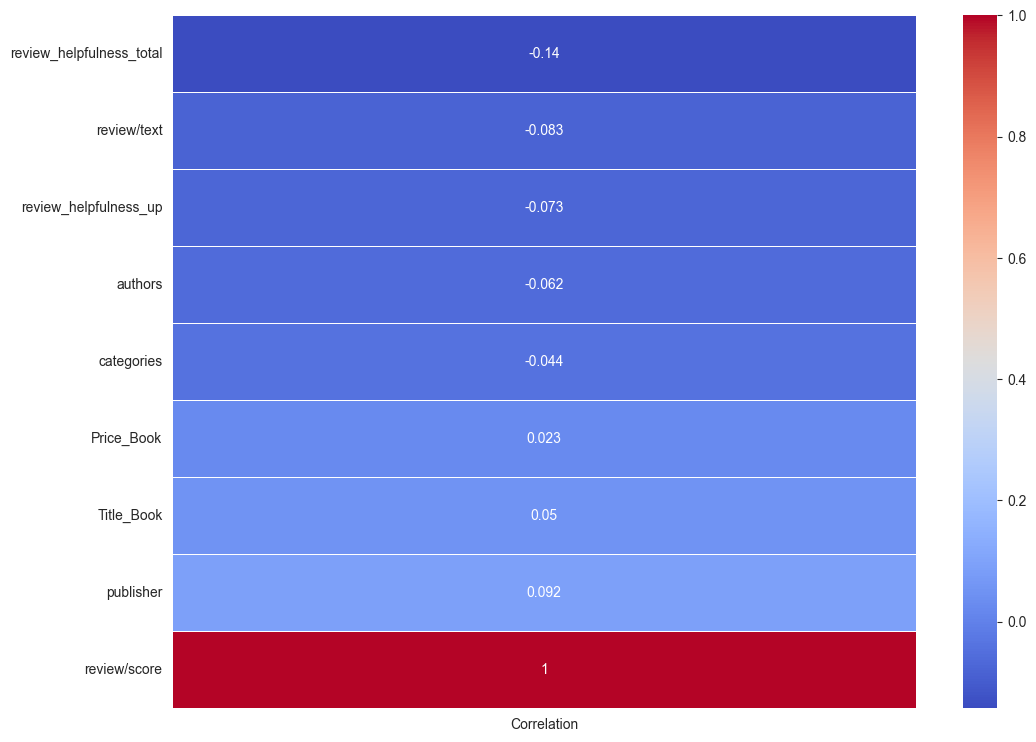

In [294]:
plt.figure(figsize=(12, 9))
sns.heatmap(correlacion_ord_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

#### Respecto a codificación one hot

In [309]:
correlacion_score_one_hot =df_one_hot.corrwith(df['review/score'])
correlacion_score_one_hot_df = pd.DataFrame(correlacion_score_one_hot, columns=['Correlation']).sort_values('Correlation').dropna()
correlacion_score_one_hot_df_abs = correlacion_score_one_hot_df.copy()
correlacion_score_one_hot_df_abs['Abs_Correlation'] =correlacion_score_one_hot_df['Correlation'].abs()
correlacion_score_one_hot_df_abs = correlacion_score_one_hot_df_abs.sort_values(by='Abs_Correlation', ascending=False)
correlacion_score_one_hot_df_abs

,Correlation,Abs_Correlation
review/score,1.000000,1.000000
authors_Thomas Harris,-0.221398,0.221398
publisher_Dell,-0.221398,0.221398
Title_Book_Hannibal,-0.221398,0.221398
Title_Book_Predator (Kay Scarpetta Mysteries),-0.187581,0.187581
...,...,...
publisher_Crown,-0.000062,0.000062
authors_Pimsleur,0.000056,0.000056
categories_Foreign Language Study,0.000056,0.000056
"Title_Book_Through Painted Deserts: Light, God, and Beauty on the Open Road",-0.000004,0.000004


In [300]:
lim_inf = lim_sup = 0
incremento = 40
correlation_df_size = correlacion_score_one_hot_df.size
rangos = list()
for i in range(0,int((correlation_df_size/incremento))+1):
    lim_inf = i*incremento
    lim_sup = ((i+1)*incremento)-1
    if lim_sup >= correlation_df_size:
        lim_sup = correlation_df_size-1
    rangos.append((lim_inf, lim_sup))

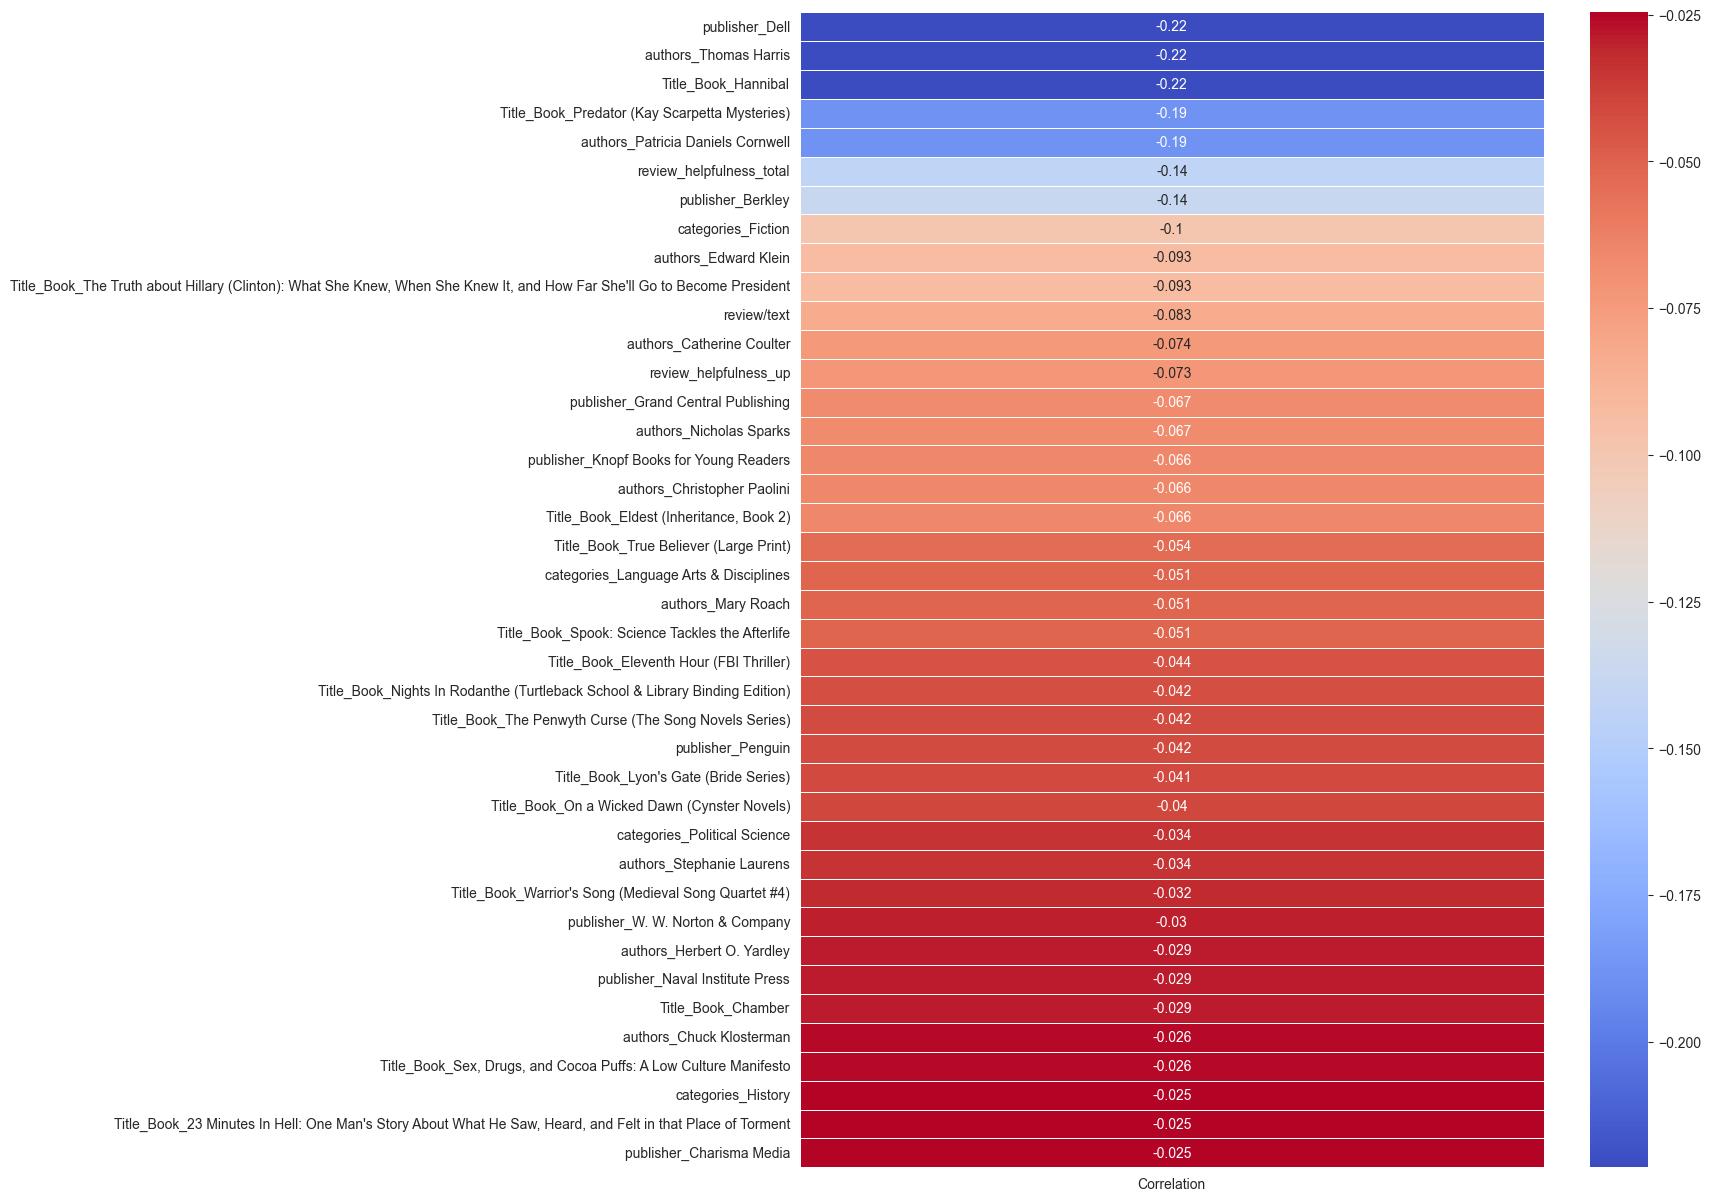

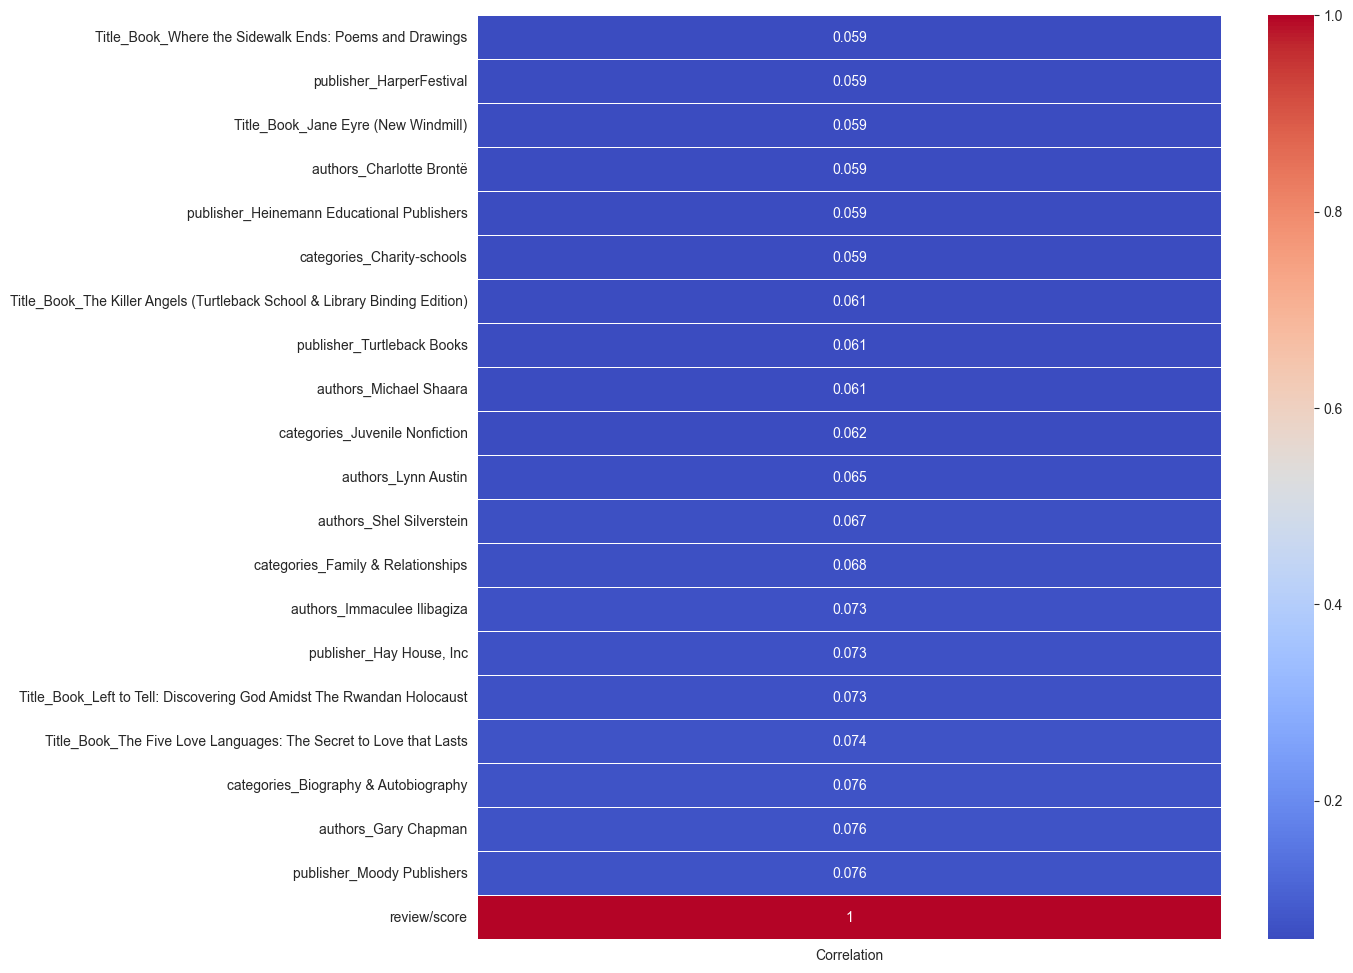

"for rango in rangos:\n    plt.figure(figsize=(12, 14))\n    sns.heatmap(correlacion_score_one_hot_df.iloc[rango[0]: rango[1]+1], annot=True, cmap='coolwarm', linewidths=0.5)\n    plt.show()"

In [310]:
plt.figure(figsize=(12, 15))
sns.heatmap(correlacion_score_one_hot_df.iloc[rangos[0][0]: rangos[0][1]+1], annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()
if len(rangos) >= 2:
    plt.figure(figsize=(12, 12))
    sns.heatmap(correlacion_score_one_hot_df.iloc[rangos[len(rangos)-1][0]: rangos[len(rangos)-1][1]+1], annot=True, cmap='coolwarm', linewidths=0.5)
    plt.show()

'''for rango in rangos:
    plt.figure(figsize=(12, 14))
    sns.heatmap(correlacion_score_one_hot_df.iloc[rango[0]: rango[1]+1], annot=True, cmap='coolwarm', linewidths=0.5)
    plt.show()'''

### Análisis de correlación respecto al precio del libro

#### Respecto a codificación ordinal

In [302]:
correlacion_score_ord =df_cod_num.corrwith(df['Price_Book'])
correlacion_ord_df = pd.DataFrame(correlacion_score_ord, columns=['Correlation']).sort_values('Correlation').dropna()
correlacion_ord_df

,Correlation
publisher,-0.203434
authors,-0.181019
review_helpfulness_up,0.004922
review_helpfulness_total,0.008064
review/score,0.022532
review/text,0.032681
categories,0.090595
Title_Book,0.117962
Price_Book,1.000000


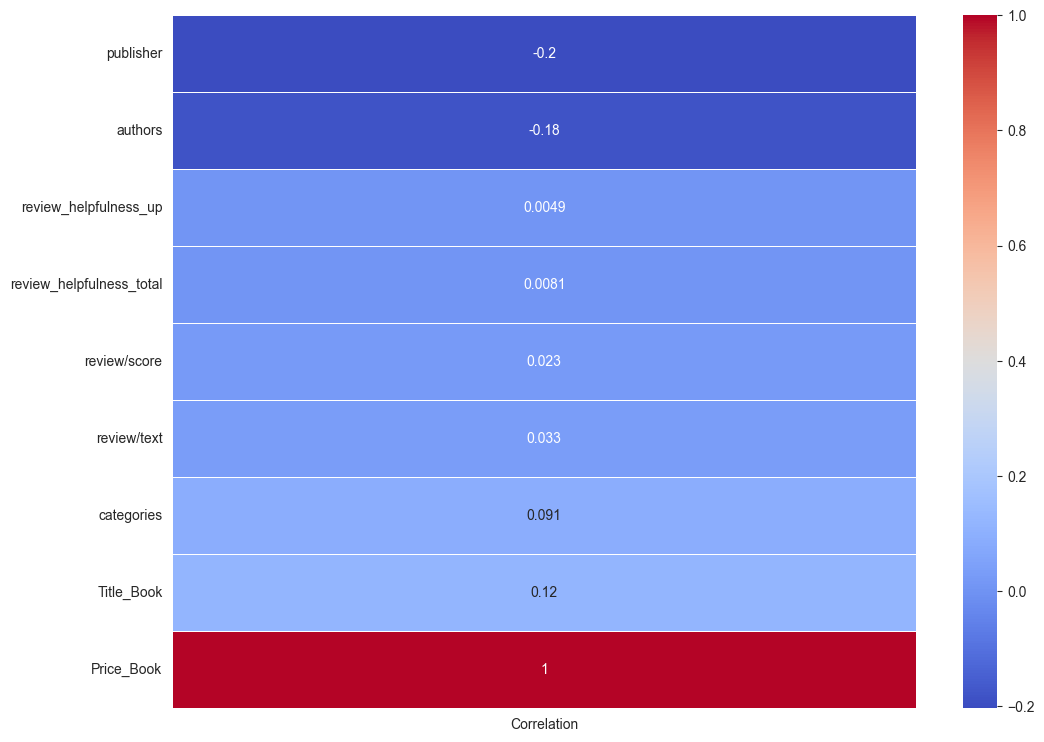

In [303]:
plt.figure(figsize=(12, 9))
sns.heatmap(correlacion_ord_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

#### Respecto a codificación one-hot

In [304]:
correlacion_score_one_hot =df_one_hot.corrwith(df['Price_Book'])
correlacion_score_one_hot_df = pd.DataFrame(correlacion_score_one_hot, columns=['Correlation']).sort_values('Correlation').dropna()
# Es necesario hacer la copia porque sino salta una excepción al momento de graficar
correlacion_score_one_hot_df_abs = correlacion_score_one_hot_df.copy()
correlacion_score_one_hot_df_abs['Abs_Correlation'] =correlacion_score_one_hot_df['Correlation'].abs()
correlacion_score_one_hot_df_abs = correlacion_score_one_hot_df_abs.sort_values(by='Abs_Correlation', ascending=False)
correlacion_score_one_hot_df_abs

,Correlation,Abs_Correlation
Price_Book,1.000000,1.000000
Title_Book_Stranger In A Strange Land: Library Edition,0.575151,0.575151
authors_Arlie Russell Hochschild,0.574673,0.574673
categories_Social Science,0.574673,0.574673
publisher_Amsterdam University Press,0.574673,0.574673
...,...,...
Title_Book_The Outlaw Of Torn,-0.000830,0.000830
Title_Book_Lie by Moonlight,0.000427,0.000427
Title_Book_The Oakdale Affair,-0.000336,0.000336
authors_Neale Donald Walsch,0.000220,0.000220


In [305]:
lim_inf = lim_sup = 0
incremento = 40
correlation_df_size = correlacion_score_one_hot_df.size
rangos = list()
for i in range(0,int((correlation_df_size/incremento))+1):
    lim_inf = i*incremento
    lim_sup = ((i+1)*incremento)-1
    if lim_sup >= correlation_df_size:
        lim_sup = correlation_df_size-1
    rangos.append((lim_inf, lim_sup))

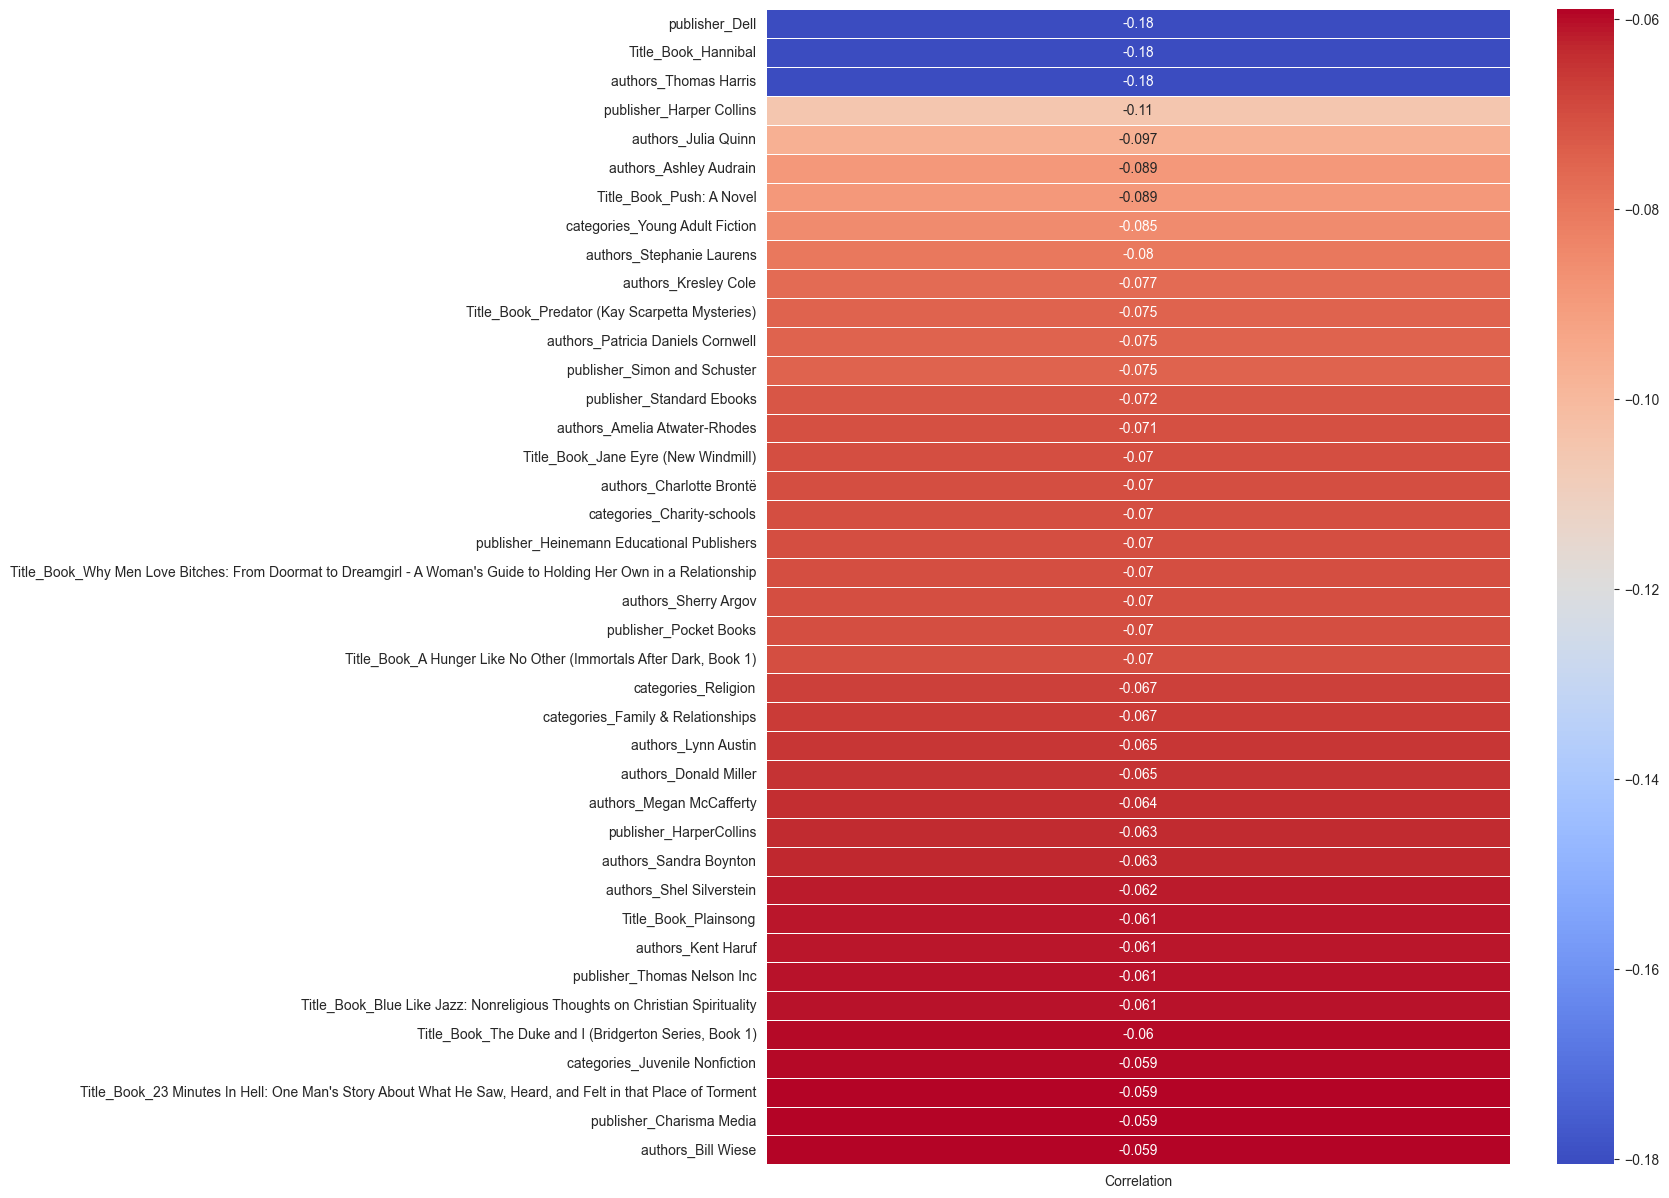

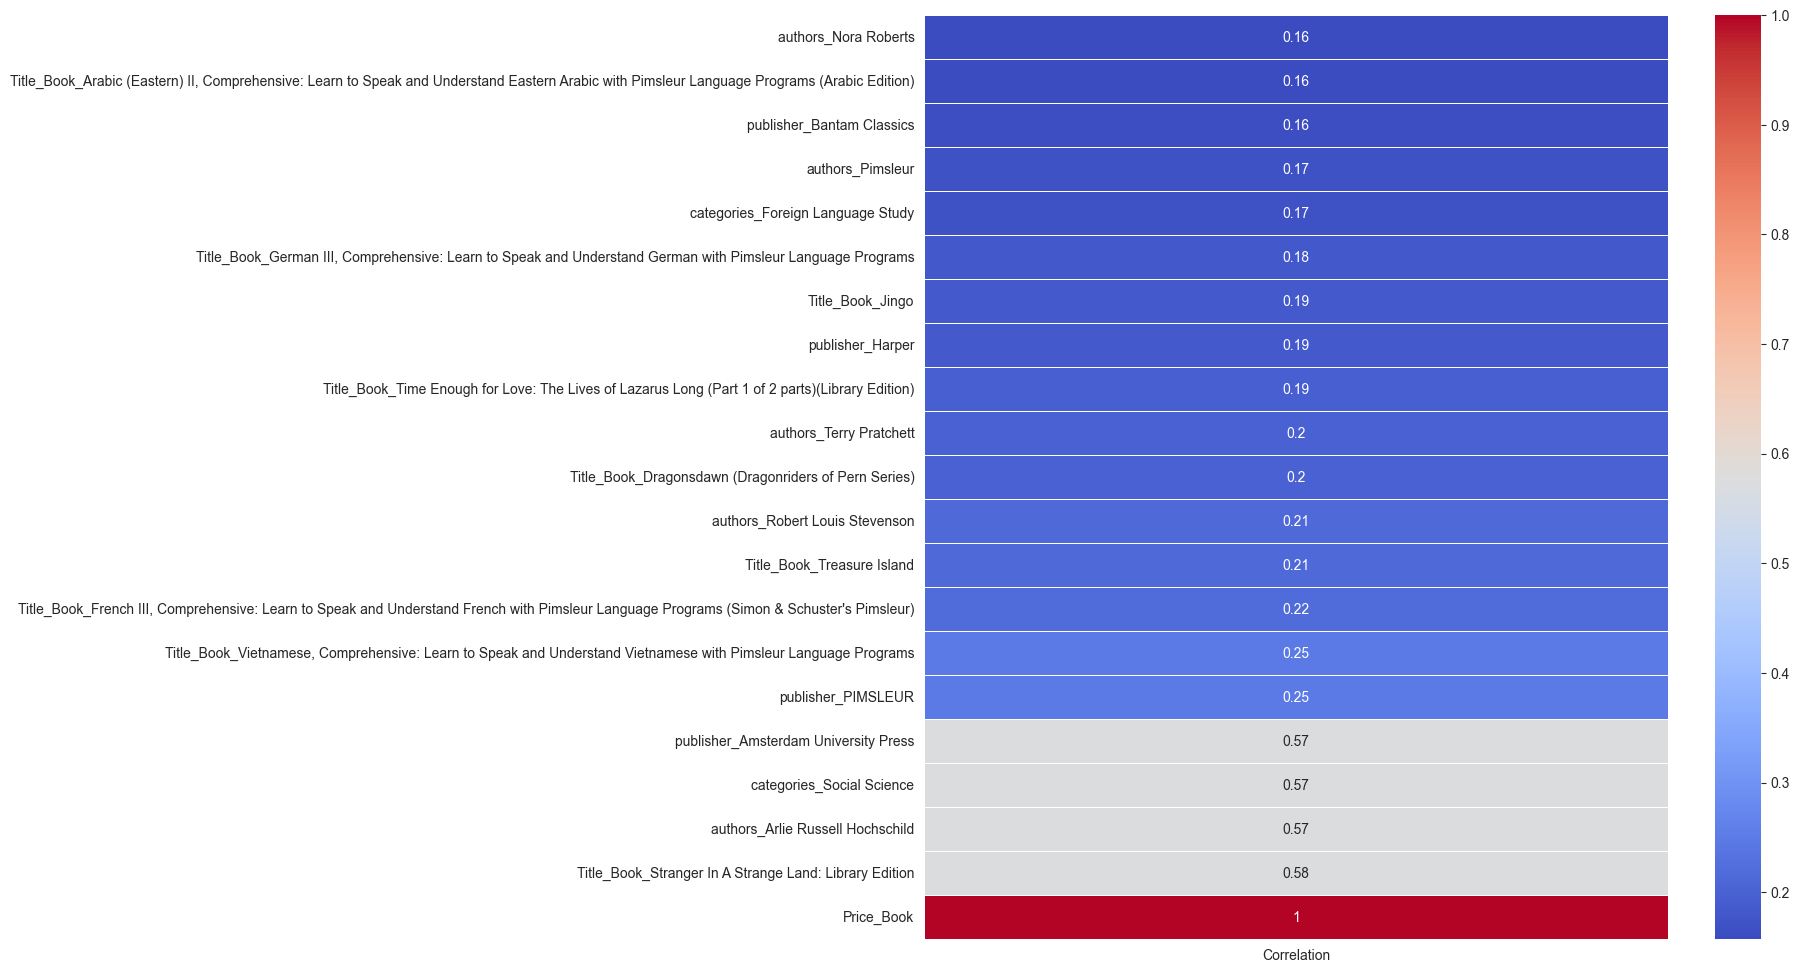

"for rango in rangos:\n    if rango[1] - rango[0] <= 0:\n        break\n    plt.figure(figsize=(12, 14))\n    sns.heatmap(correlacion_score_one_hot_df.iloc[rango[0]: rango[1]+1], annot=True, cmap='coolwarm', linewidths=0.5)\n    plt.show()"

In [308]:
# En vez de mostrar TODOS los gráficos (son más de 300 elementos que se tienen que mostrar) se pueden mostrar solo el primero y el último
#Que al final son los que tienen los datos más significativos para las correlaciones negativas y positivas

plt.figure(figsize=(12, 15))
sns.heatmap(correlacion_score_one_hot_df.iloc[rangos[0][0]: rangos[0][1]+1], annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()
if len(rangos) >= 2:
    plt.figure(figsize=(12, 12))
    sns.heatmap(correlacion_score_one_hot_df.iloc[rangos[len(rangos)-1][0]: rangos[len(rangos)-1][1]+1], annot=True, cmap='coolwarm', linewidths=0.5)
    plt.show()

'''for rango in rangos:
    if rango[1] - rango[0] <= 0:
        break
    plt.figure(figsize=(12, 14))
    sns.heatmap(correlacion_score_one_hot_df.iloc[rango[0]: rango[1]+1], annot=True, cmap='coolwarm', linewidths=0.5)
    plt.show()'''